In [1]:
from PIL import Image
import numpy as np
import cv2

# Load the TIFF image
tiff_image_path = 'data/dataset/PocImagesRGB/RGB-PanSharpen_AOI_3_Paris_img432.tif'  # Replace with your TIFF image path
tiff_image = Image.open(tiff_image_path)

# Compress the TIFF image to PNG format
png_image_path = 'compressed_image.png'
tiff_image.save(png_image_path, 'PNG')

# Load the compressed PNG image
compressed_image = cv2.imread(png_image_path)

# Normalize the image to float values
compressed_image_float = compressed_image.astype(np.float32) / 255.0

# Add controlled Gaussian noise
mean = 0
std_dev = 0.1  # Adjusted for better visibility
gaussian_noise = np.random.normal(mean, std_dev, compressed_image_float.shape)
noisy_image_float = compressed_image_float + gaussian_noise
noisy_image_float = np.clip(noisy_image_float, 0, 1)  # Clip values to stay within valid range

# Convert noisy image back to uint8
noisy_image = (noisy_image_float * 255).astype(np.uint8)

# Save the noisy image
noisy_image_path = 'noisy_image.png'
cv2.imwrite(noisy_image_path, noisy_image)

# Load the noisy image for denoising
decompressed_noisy_image = cv2.imread(noisy_image_path)

# Denoise the image using Non-Local Means Denoising
denoised_image = cv2.fastNlMeansDenoisingColored(decompressed_noisy_image, None, 10, 10, 7, 21)

# Save the denoised image
denoised_image_path = 'denoised_image.png'
cv2.imwrite(denoised_image_path, denoised_image)

# Display the images (optional)
cv2.imshow('Compressed Image', compressed_image)
cv2.imshow('Noisy Image', noisy_image)
cv2.imshow('Decompressed Noisy Image', decompressed_noisy_image)
cv2.imshow('Denoised Image', denoised_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
input = "/Users/yashpulse/Library/CloudStorage/OneDrive-SwinburneUniversity/Semester 4/TAP/CH1/research/yash/data/dataset/PocImagesRGB/RGB-PanSharpen_AOI_2_Vegas_img699.tif"
output = "/Users/yashpulse/Library/CloudStorage/OneDrive-SwinburneUniversity/Semester 4/TAP/CH1/research/yash/data/dataset/PocImagesCompressed/RGB-PanSharpen_AOI_2_Vegas_img699.png"


# load image into variable and convert to numpy array usin PIL
from PIL import Image

i_image = Image.open(input)
o_image = Image.open(output)

import numpy as np

i_image = np.array(i_image)
o_image = np.array(o_image)


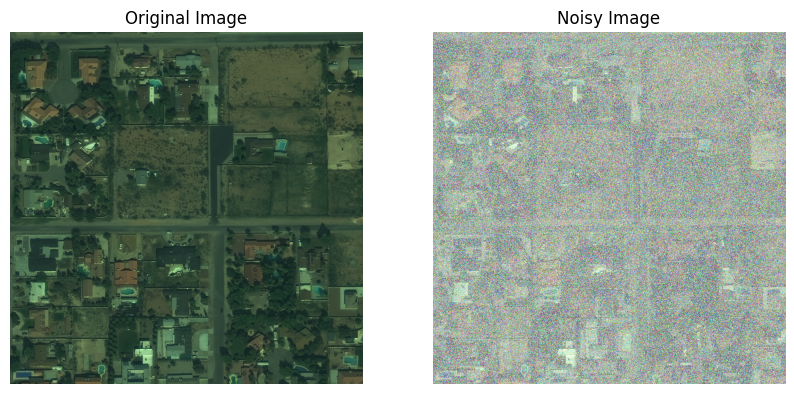

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(image, mean=0, sigma=25):
    # Generate Gaussian noise
    noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    # Add the noise to the image
    noisy_image = cv2.add(image, noise)
    return noisy_image

# Load the image
image_path = '/Users/yashpulse/Library/CloudStorage/OneDrive-SwinburneUniversity/Semester 4/TAP/CH1/research/yash/data/dataset/PocImagesCompressed/RGB-PanSharpen_AOI_2_Vegas_img699.png'  # Change this to your image path
image = cv2.imread(image_path)

# Add noise
noisy_image = add_gaussian_noise(image)

# Display the original and noisy images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


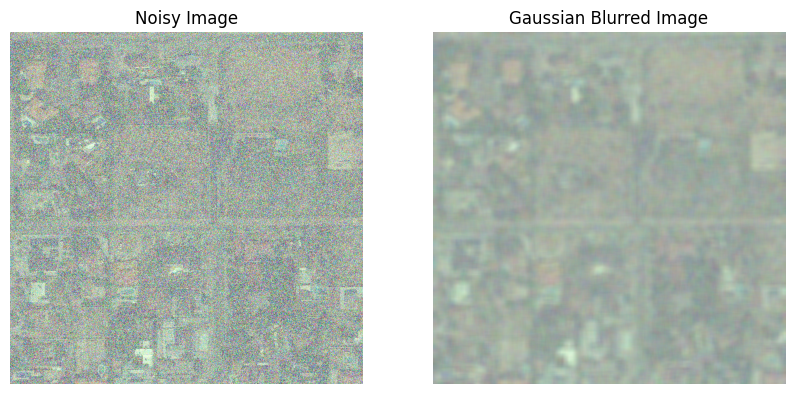

In [21]:
gaussian_blur = cv2.GaussianBlur(noisy_image, (25, 25), 500)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gaussian Blurred Image')
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

In [6]:
o_image

array([[[ 65,  88,  66],
        [ 66,  89,  66],
        [ 67,  89,  66],
        ...,
        [ 88, 119,  84],
        [ 88, 118,  84],
        [ 89, 120,  84]],

       [[ 65,  87,  65],
        [ 64,  87,  65],
        [ 64,  87,  65],
        ...,
        [ 87, 117,  83],
        [ 84, 114,  81],
        [ 85, 116,  82]],

       [[ 63,  86,  64],
        [ 63,  86,  64],
        [ 64,  86,  64],
        ...,
        [ 77, 106,  77],
        [ 75, 105,  76],
        [ 73, 102,  74]],

       ...,

       [[ 54,  77,  60],
        [ 43,  66,  53],
        [ 31,  52,  44],
        ...,
        [ 79,  78,  57],
        [ 79,  78,  57],
        [ 72,  71,  53]],

       [[ 51,  74,  58],
        [ 40,  62,  50],
        [ 34,  55,  46],
        ...,
        [ 74,  73,  54],
        [ 75,  74,  55],
        [ 82,  81,  59]],

       [[ 56,  80,  61],
        [ 57,  81,  62],
        [ 52,  76,  59],
        ...,
        [ 76,  75,  55],
        [ 79,  78,  57],
        [ 84,  83,  60]]